<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 9: Classification

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?). 

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data. 

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

In [8]:
# Load required libraries
#library(tidyverse)

# Load data 
lexical_data <- read_csv("Homework datasets/lexDat/LexicalData_withIncorrect.csv")
items_data <- read_csv("Homework datasets/lexDat/Items.csv")

# Join the datasets and drop NA values
fdata <- lexical_data %>%
  left_join(items_data, by = c("D_Word" = "Word")) %>%
  drop_na()

# View the first few rows
head(fdata)

New names:
• `` -> `...1`
Rows: 74869 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): D_Word
dbl (6): ...1, Sub_ID, Trial, Type, D_Zscore, Correct
num (1): D_RT
lgl (1): Outlier

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 30959 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Word
dbl (3): Occurrences, Length, Log_Freq_HAL
num (1): Freq_HAL

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct,Occurrences,Length,Freq_HAL,Log_Freq_HAL
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,157,1,1,710,browse,FALSE,-0.437,1,2,6,7016,8.856
2,67,1,1,1094,refrigerant,FALSE,0.825,1,3,11,104,4.644
3,120,1,1,587,gaining,FALSE,-0.645,1,4,7,4039,8.304
4,21,1,1,984,cheerless,FALSE,0.025,1,4,9,14,2.639
5,236,1,1,577,pattered,FALSE,-0.763,1,4,8,4,1.386
6,236,2,1,715,conjures,FALSE,-0.364,1,4,8,194,5.268


---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

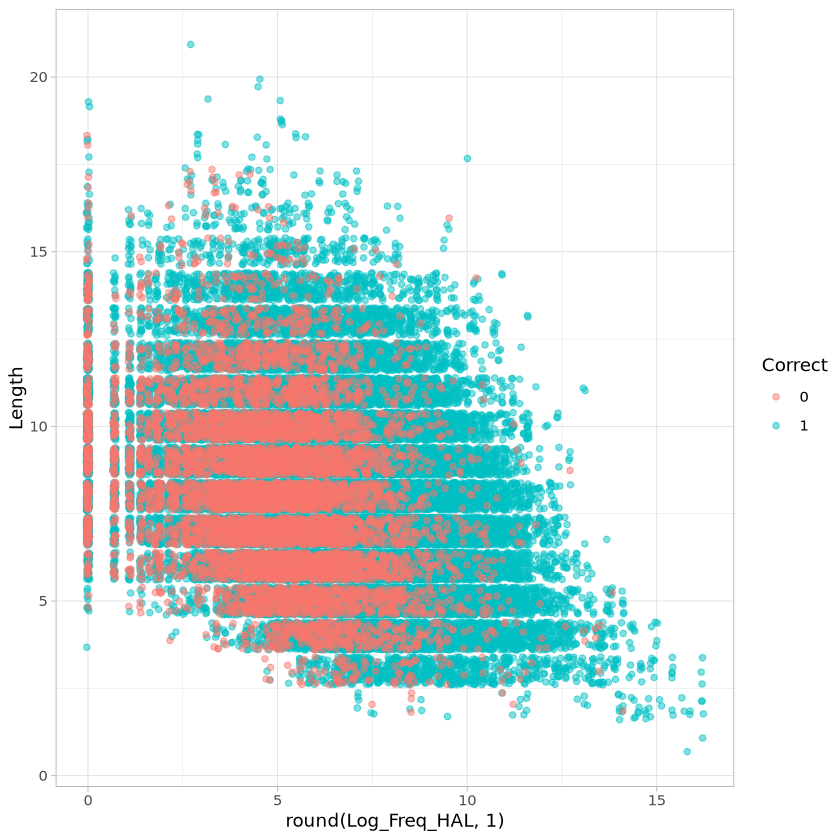

In [9]:
#vrequire(tidyverse) # Load the tidyverse package
fdata$Correct <- as.factor(fdata$Correct) # Correct is categorical, not numeric. 

# plot the Correct / Incorrect clusters
ggplot(fdata,aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) + 
    geom_point(position="jitter",alpha=0.5) + 
    theme_light() 


What do you observe about the "Correct" and "Incorrect" clusters? 

> *Write your reponse here* 
> both word frequency and length may be predictive of response correctness 

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [17]:
# Fit logistic regression model
logit_model <- glm(Correct ~ Length * Log_Freq_HAL, 
                   data = fdata, 
                   family = binomial)

# View the model summary
summary(logit_model)


Call:
glm(formula = Correct ~ Length * Log_Freq_HAL, family = binomial, 
    data = fdata)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5


What can you conclude from this output? (a brief gist is fine)

> *Write your response here* 
> all predictors are highly significant

---
## 4. Interpreting predictions from the model (3 points)

Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [18]:
# Generate predicted probabilities
pred_probs <- predict(logit_model, type = "response")

# Convert probabilities to predicted class using 0.5 threshold
pred_class <- ifelse(pred_probs > 0.5, 1, 0)

# Create confusion matrix
conf_matrix <- table(Predicted = pred_class, Actual = fdata$Correct)
print(conf_matrix)

# Calculate accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Accuracy:", round(accuracy * 100, 2), "%"))

         Actual
Predicted     0     1
        0    13    44
        1  7966 62566
[1] "Accuracy: 88.65 %"


Did the model do well at predicting lexical decision correctness? Why or why not? 

> *Write your response here*  
> the model has a biased toward predicting "correct" so it does well with predicting correctness, but less well at identifying true negatives.

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`. 

*Hint: see the Classifiers tutorial.*

In [11]:
# Load the MASS library
library(MASS)

# Fit QDA model
qda_model <- qda(as.factor(Correct) ~ Length * Log_Freq_HAL, data = fdata)

# Generate predictions
qda_pred <- predict(qda_model)

# Print the QDA model summary
print(qda_model)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Call:
qda(as.factor(Correct) ~ Length * Log_Freq_HAL, data = fdata)

Prior probabilities of groups:
        0         1 
0.1130346 0.8869654 

Group means:
    Length Log_Freq_HAL Length:Log_Freq_HAL
0 8.047124     4.932123            37.95260
1 7.979971     6.444849            49.34219


Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy. 

In [12]:
# Create confusion matrix for QDA predictions
qda_conf_matrix <- table(Predicted = qda_pred$class, Actual = fdata$Correct)
print(qda_conf_matrix)

# Calculate accuracy
qda_accuracy <- sum(diag(qda_conf_matrix)) / sum(qda_conf_matrix)
print(paste("QDA Accuracy:", round(qda_accuracy * 100, 2), "%"))

         Actual
Predicted     0     1
        0   455  1647
        1  7524 60963
[1] "QDA Accuracy: 87.01 %"


How does QDA prediction performance differ from that of logistic regression?

> *Write your response here* 
> QDA was better at identifying true negatives.

**DUE:** 5pm EST, March 11, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*